In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# specifying path in Google Drive
file_path = "/content/drive/My Drive/data/healthcare-dataset-stroke-data.csv"

# reading
df = pd.read_csv(file_path)

# checking
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Basic statistics of numerical columns
df.describe()

df.info()


In [ ]:
# checking missing values in every column
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values[missing_values > 0]


,0
bmi,201


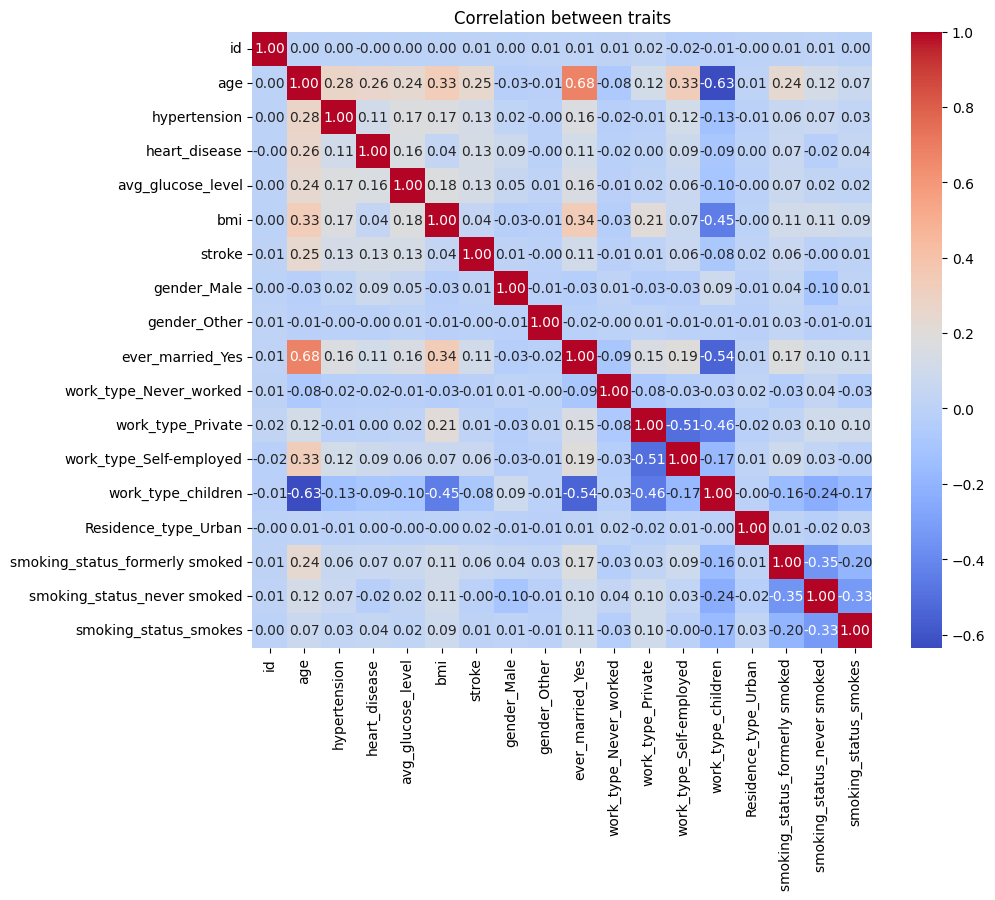

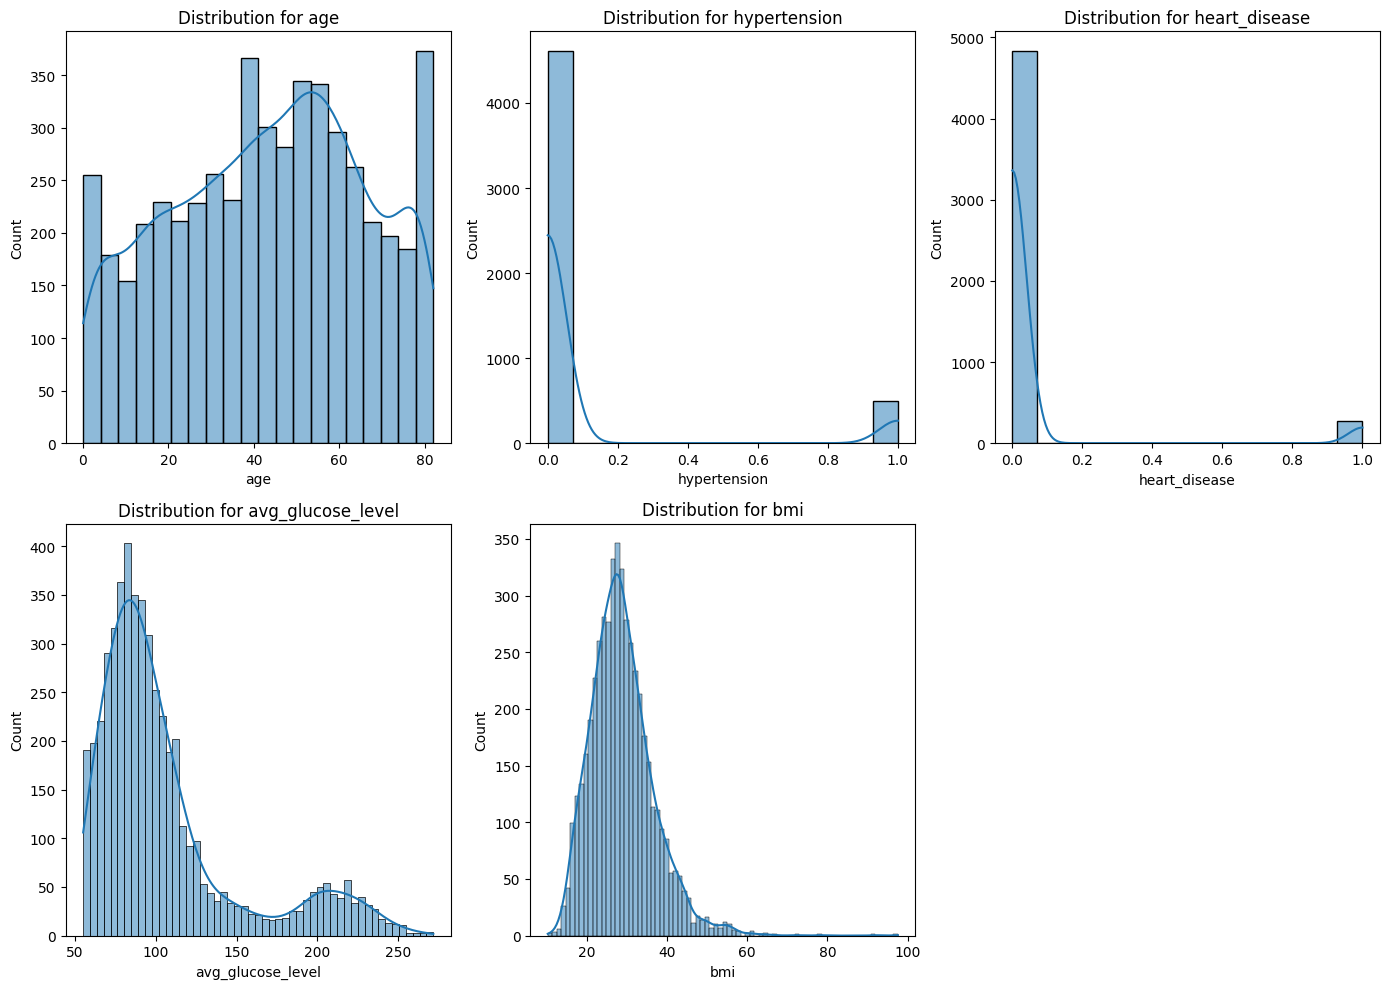

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to numeric variables
df_encoded = pd.get_dummies(df, drop_first = True)

#counting correlation
correlation_matrix = df_encoded.corr()

#visualize correlation
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', cbar = True)
plt.title("Сorrelation between traits")
plt.show()

#list of numerical columns
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

#printing distribution for numeric values
plt.figure(figsize = (14, 10))
for i, column in enumerate(numerical_columns, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[column], kde = True)
  plt.title(f"Distribution for {column}")
  plt.tight_layout()
plt.show()

# Stroke Prediction Dataset Analysis

## Project Goal
The goal of this project is to analyze the Stroke Prediction Dataset to identify key risk factors associated with strokes. This will help in understanding correlations between different medical and lifestyle factors.

## Dataset Description
The dataset contains patient information, including demographic details, medical history, and lifestyle factors. The target variable is whether a patient has had a stroke (1) or not (0).

## Key Steps:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Correlation Analysis
5. Data Visualization
6. Summary and Key Insights

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "YOUR_FILE_PATH"  # Update with the actual path
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Encode categorical variables if needed
df = pd.get_dummies(df, drop_first=True)

# Display the updated dataframe info
df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'YOUR_FILE_PATH'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive


'Colab Notebooks'   data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Downloading data
df = pd.read_csv("/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv")

# Dropping
df.drop(columns=["id"], inplace=True)

# Fill missing values ​​in bmi with median
imputer = SimpleImputer(strategy="median")
df["bmi"] = imputer.fit_transform(df[["bmi"]])

# Coding of categorical variables
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting data into features (X) and target variable (y)
X = df.drop(columns=["stroke"])
y = df["stroke"]

# Split into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("The data is ready to train the model!")


The data is ready to train the model!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)


# Model quality assessment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9521

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model with class balancing
model_balanced = LogisticRegression(class_weight='balanced', random_state=42)


# Train the model
model_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = model_balanced.predict(X_test)

# Model evaluation
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'Accuracy: {accuracy_balanced:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_balanced))

Accuracy: 0.7387

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and the target variable
x = df.drop('stroke', axis=1)
y = df['stroke']

# Convert categorical features to numeric using OneHotEncoder or LabelEncoder
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to increase the smaller class in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on class-balanced data
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

#Predicitons
y_pred = model.predict(X_test)

# Evaluating the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8454011741682974
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       960
           1       0.17      0.39      0.23        62

    accuracy                           0.85      1022
   macro avg       0.56      0.63      0.57      1022
weighted avg       0.91      0.85      0.87      1022



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!git clone https://github.com/KBinjuminW/stroke-data-analysis.git

Cloning into 'stroke-data-analysis'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 861.25 KiB | 4.95 MiB/s, done.


In [ ]:
%cd /content/stroke-data-analysis

!git add .

!git commit -m "Machine Learning"

!git push origin main

/content/stroke-data-analysis
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@a7b1e3dd65b6.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!ls /content/drive/MyDrive/data


healthcare-dataset-stroke-data.csv


In [ ]:
import pandas as pd

# Specify the path to the file in Google Drive
file_path = "/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv"

# Load the file into pandas DataFrame
df = pd.read_csv(file_path)

# Let's look at the first 5 lines
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# 1. Converting Categorical Variables to Numeric Variables
from sklearn.preprocessing import LabelEncoder

# Converting Columns with Categorical Data to Numeric Values
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 2. Handling missing values
# For numerical data, fill in the blanks with the average value
df = df.fillna(df.mean())

# For categorical data, if available, fill in with the most common value
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Data scaling
from sklearn.preprocessing import StandardScaler

# Standardizing the data (scaling it into a standard form)
scaler = StandardScaler()

# Scaling all numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Data is now ready for further analysis or modeling


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
sns.countplot(x = df['stroke'], palette = 'pastel')
plt.title("Class distribution (Stroke vs No stroke)")
plt.show()

df.hist(figsize = (12, 10), bins = 30, edgecolor = 'black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

<ipython-input-19-92c1691eecf3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
<ipython-input-19-92c1691eecf3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
<ipython-input-19-92c1691eecf3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")


KeyError: 'ever-married'

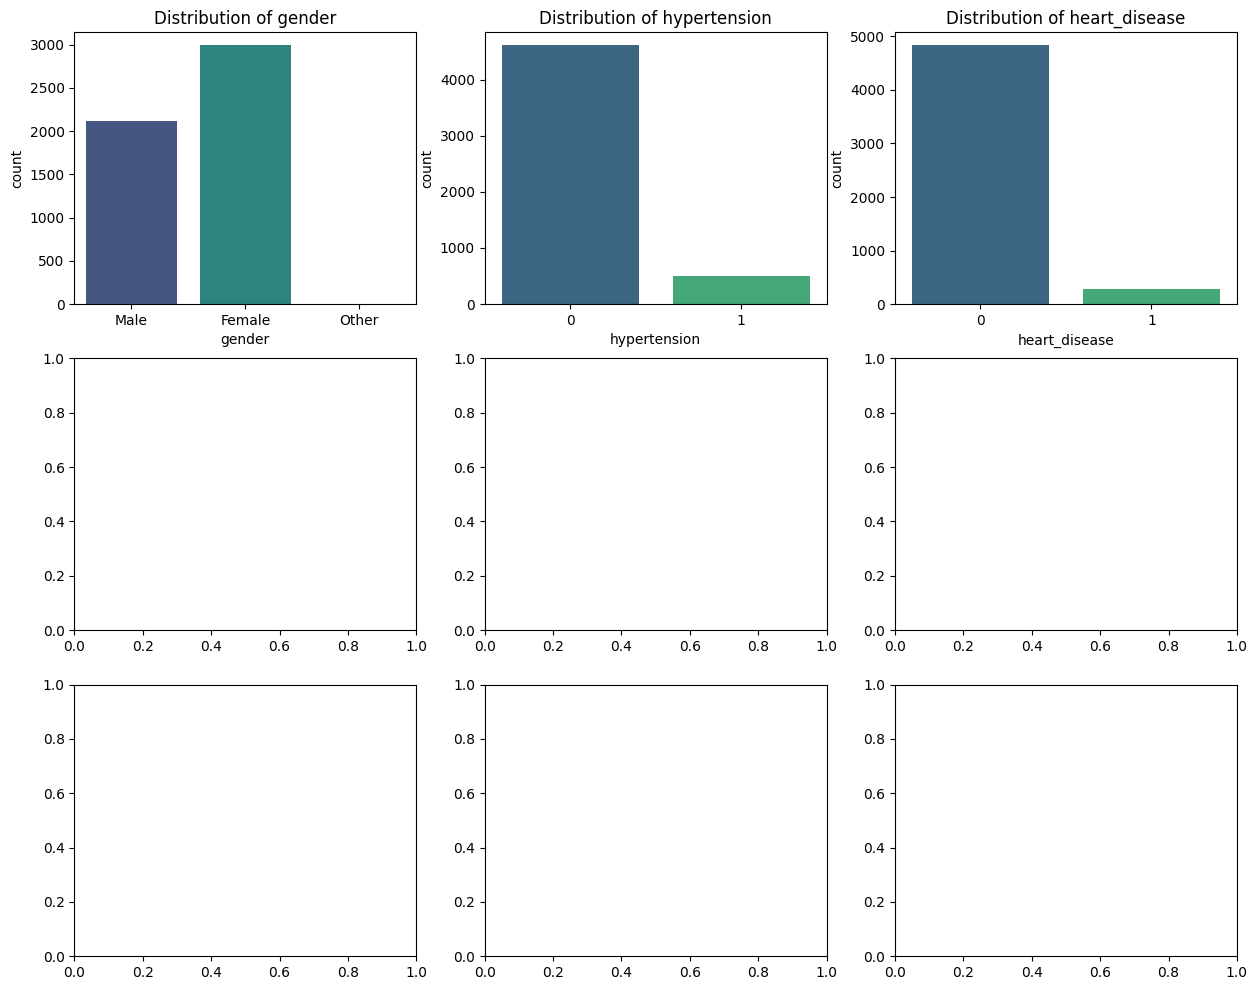

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#List of categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever-married', 'work-type', 'Residence-type', 'smoking-status']

#Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

#Plot bar charts
for i, col in enumerate(categorical_columns):
  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
  axes[i].set_title(f"Distribution of {col}")

#Remove empty subplots if any
for j in range(+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
print(df[col].unique())

NameError: name 'df' is not defined

In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

#check downloading
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/data/healthcare-dataset-stroke-data.csv'

In [ ]:
!ls /content/drive/MyDrive


ls: cannot access '/content/drive/MyDrive': No such file or directory


In [ ]:
!ls /content/drive/MyDrive/data


ls: cannot access '/content/drive/MyDrive/data': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   data


In [ ]:
!ls /content/drive/MyDrive/data

healthcare-dataset-stroke-data.csv


file_path = "/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)
df.head()

Categories in ccolumn gender: ['Male' 'Female' 'Other']
Categories in ccolumn ever_married: ['Yes' 'No']
Categories in ccolumn work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in ccolumn Residence_type: ['Urban' 'Rural']
Categories in ccolumn smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Missing values in gender: 0
Missing values in ever_married: 0
Missing values in work_type: 0
Missing values in Residence_type: 0
Missing values in smoking_status: 0


<ipython-input-18-2a86d04d23c7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


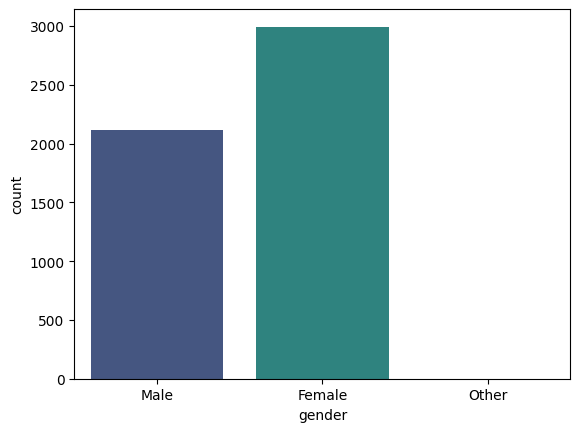

<ipython-input-18-2a86d04d23c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
<ipython-input-18-2a86d04d23c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
<ipython-input-18-2a86d04d23c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
<ipython-input-18-2a86d04d23c7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

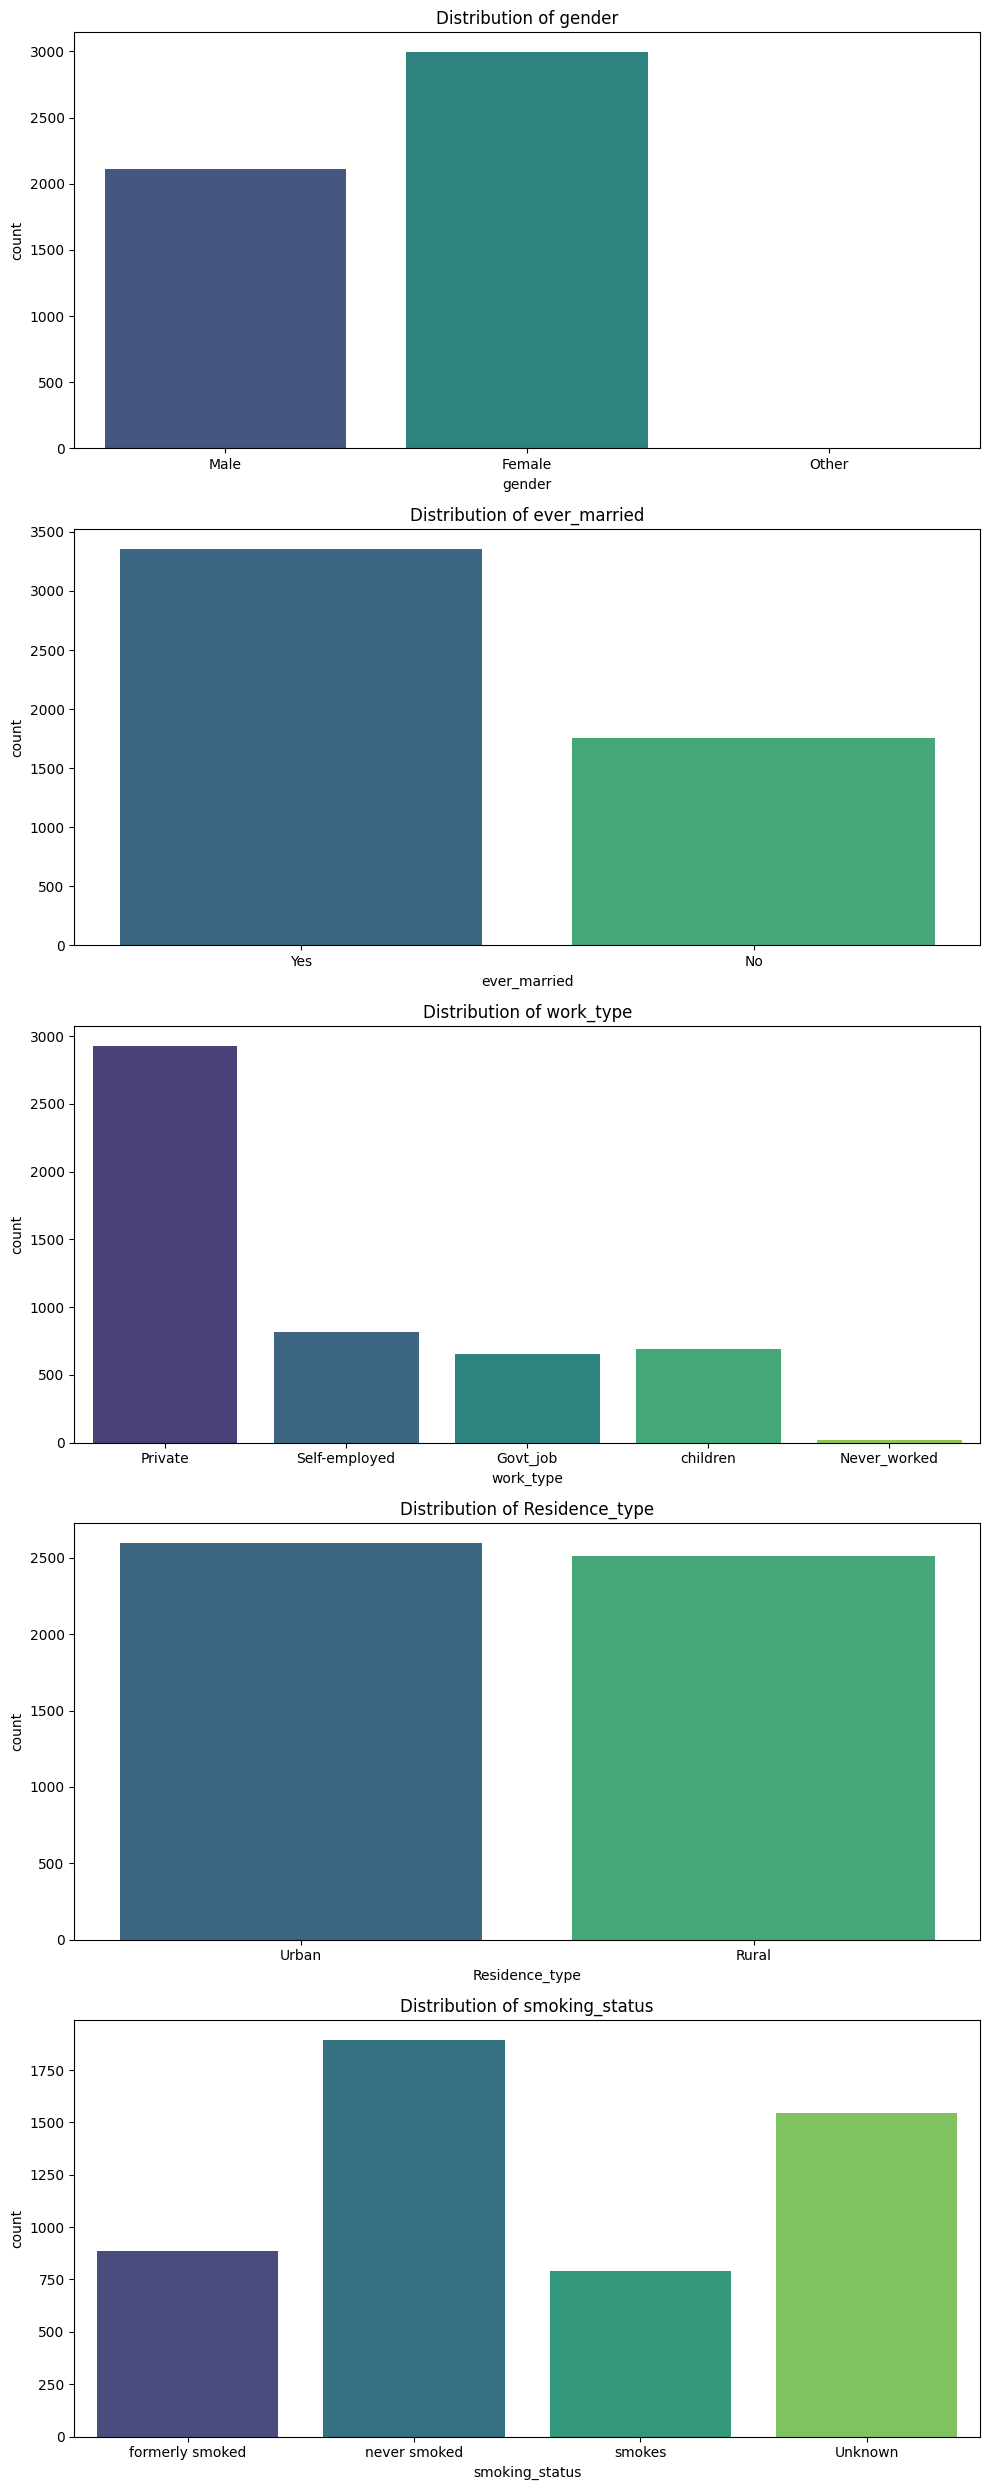

In [ ]:
#For all categorical columns
for col in df.select_dtypes(include='object').columns:
  print(f"Categories in ccolumn {col}: {df[col].unique()}")

for col in df.select_dtypes(include='object').columns:
  print(f"Missing values in {col}: {df[col].isnull().sum()}")

for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].str.strip() #deleting extra spaces

import seaborn as sns
import matplotlib.pyplot as plt

#example: for one column
sns.countplot(data=df, x='gender', palette='viridis')
plt.show()

#for all categorical columns
fig, axes = plt.subplots(len(df.select_dtypes(include='object').columns), 1, figsize=(10, 5 * len(df.select_dtypes(include='object').columns)))
for i, col in enumerate(df.select_dtypes(include='object').columns):
  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
  axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

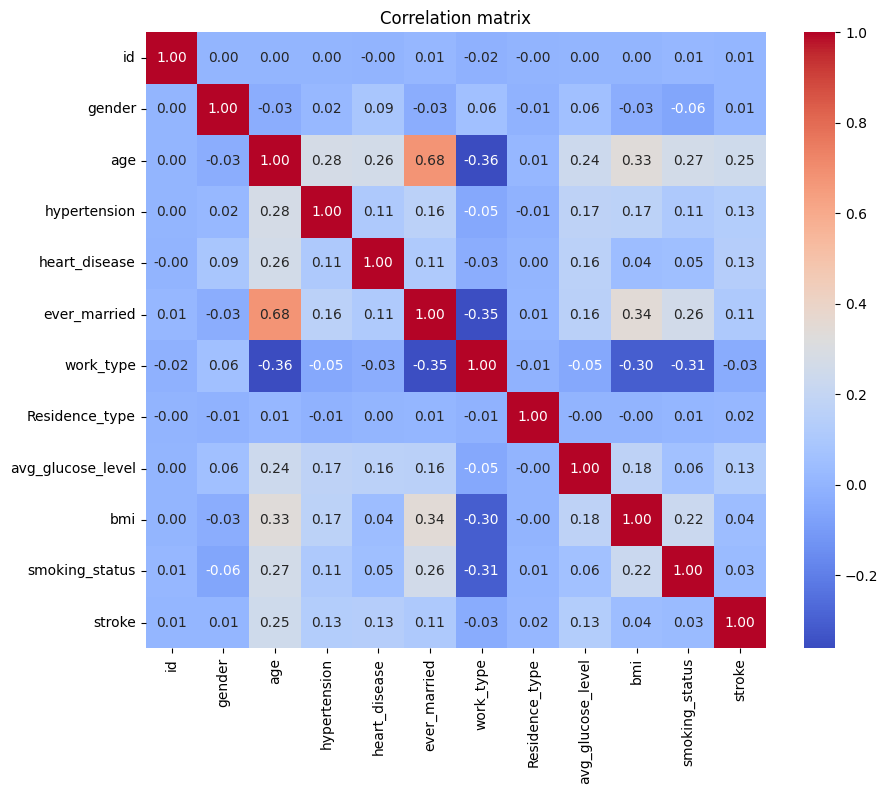

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

#initializing LabelEncoder
label_encoder = LabelEncoder()

#sorting out all categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = label_encoder.fit_transform(df[col])

#calculate the correlation matrix
correlation_matrix = df.corr()

#plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation matrix")
plt.show()

<ipython-input-22-b11cab5e184b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


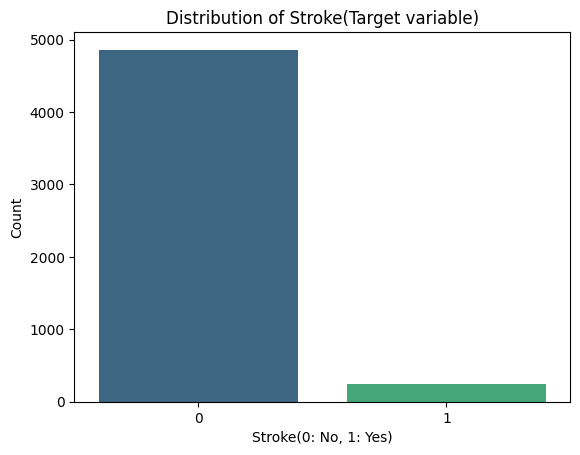

In [ ]:
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Distribution of Stroke(Target variable)')
plt.xlabel('Stroke(0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

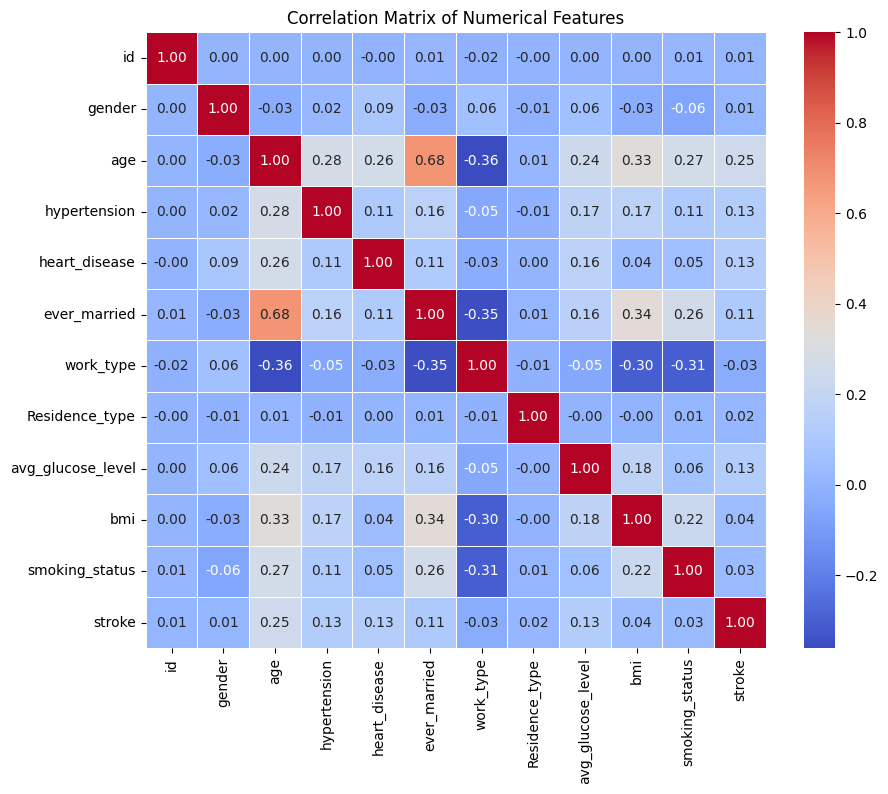

In [ ]:
# getting only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# counting correlation of numerical values
correlation_matrix = df[numerical_cols].corr()

# building correlation chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of categorical values
categorical_columns = df.select_dtypes(include=['object']).columns

# creating subcharts for categorical values
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 5 * len(categorical_columns)))

# If there is noly one value, it will not be a list. So creating list
if len(categorical_columns) == 1:
    axes = [axes]

# building charts
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {col} with respect to Stroke')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x0 with 0 Axes>

In [ ]:
# cheking data types
print(df.dtypes)

# checking if there are categorical values at all
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object
Categorical columns: Index([], dtype='object')


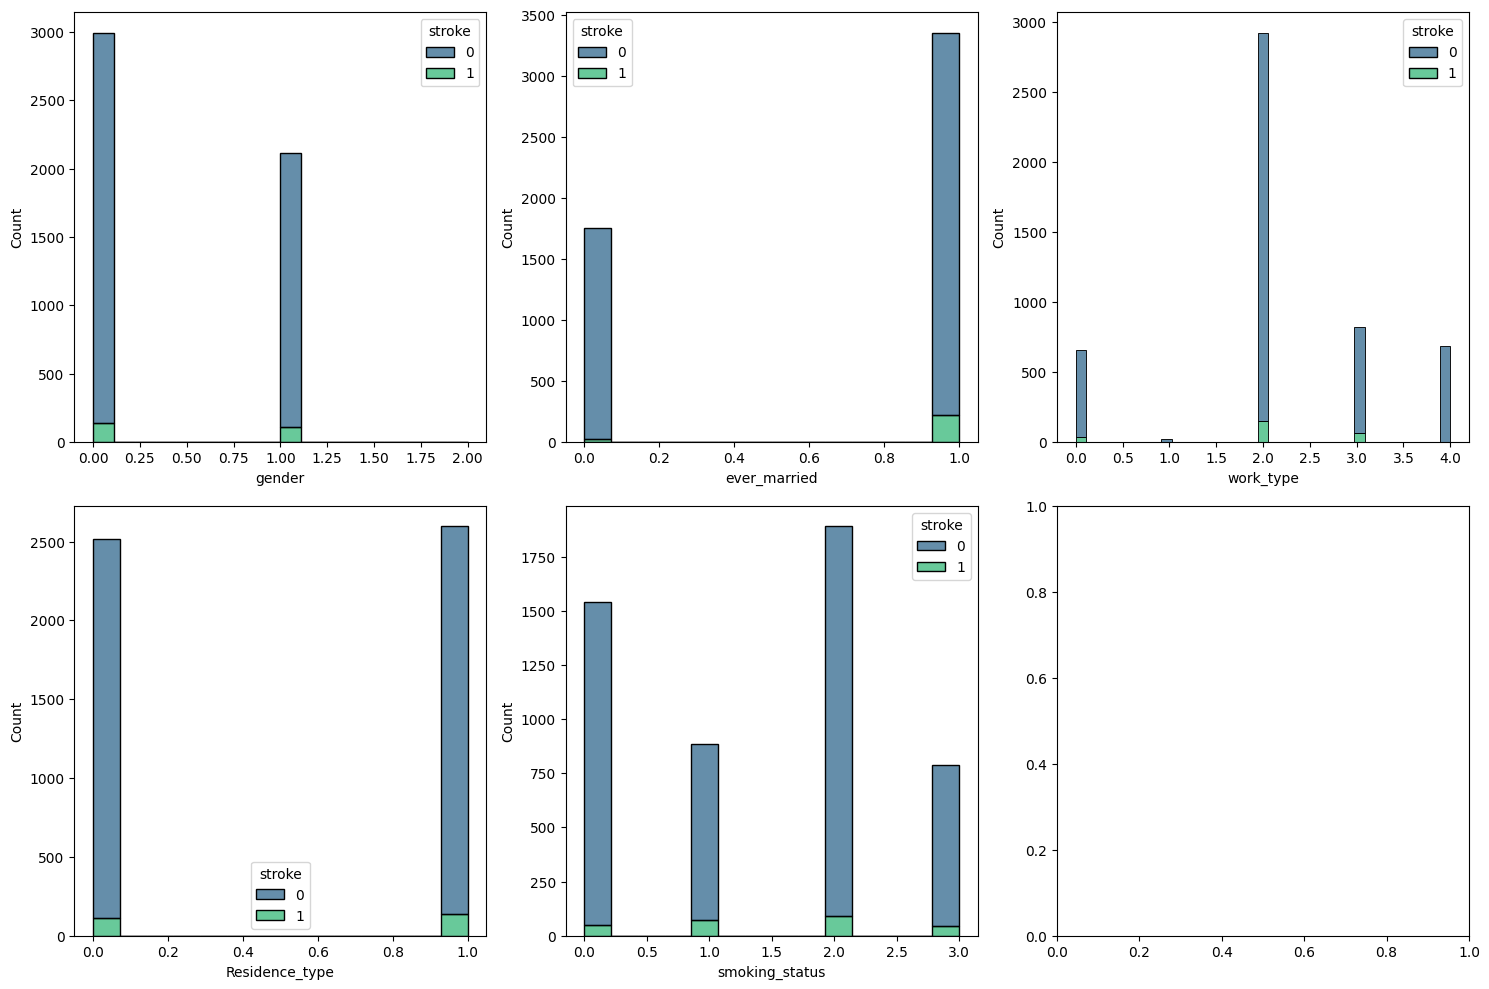

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_encoded_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 lines, 3 columns (change it, if needed)
axes = axes.flatten()

for i, col in enumerate(categorical_encoded_columns):
    sns.histplot(data=df, x=col, hue="stroke", multiple="stack", palette="viridis", ax=axes[i])

plt.tight_layout()
plt.show()


<ipython-input-28-5041b2960183>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=col, palette="viridis", ax=axes[i])
<ipython-input-28-5041b2960183>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=col, palette="viridis", ax=axes[i])
<ipython-input-28-5041b2960183>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=col, palette="viridis", ax=axes[i])


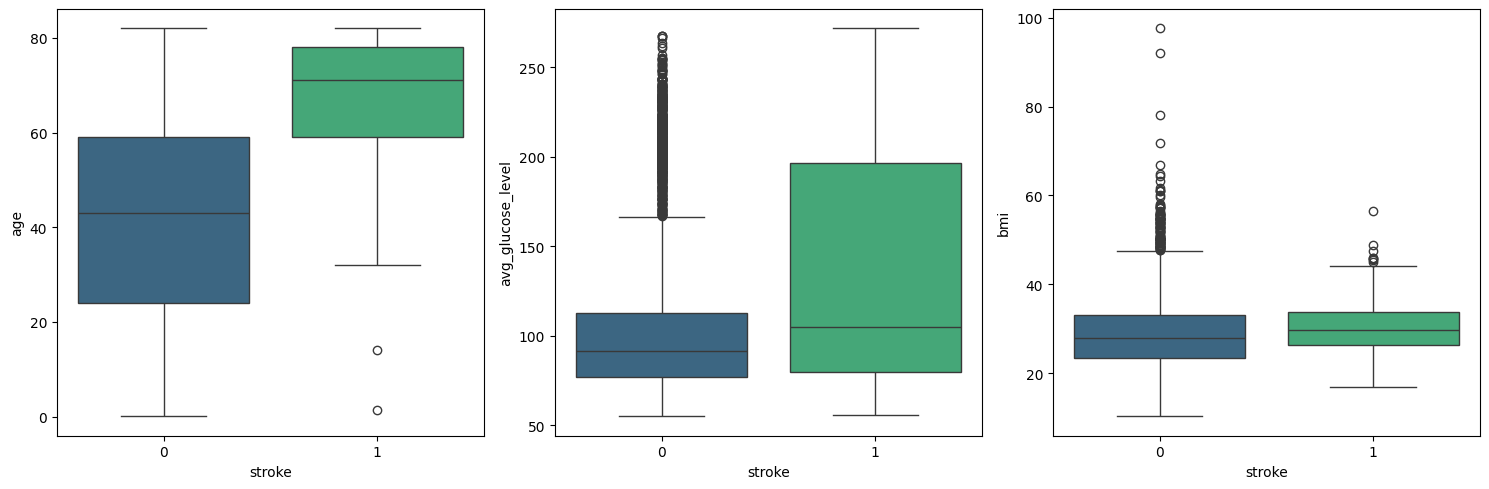

In [ ]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 line, 3 columns
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x="stroke", y=col, palette="viridis", ax=axes[i])

plt.tight_layout()
plt.show()


In [ ]:
!ls /content/drive/MyDrive

ls: cannot access '/content/drive/MyDrive': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive

file_path = "/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)
df.head()

print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   data
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


<ipython-input-12-62eb1e11468d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='viridis')
<ipython-input-12-62eb1e11468d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette='viridis')


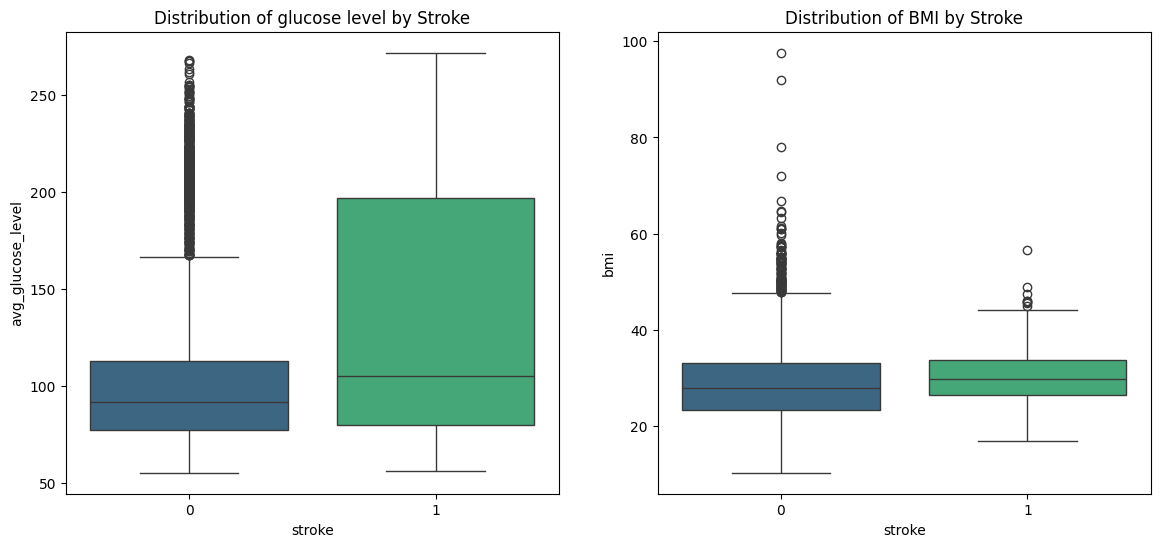

<ipython-input-12-62eb1e11468d>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'], label="No Stroke", shade=True)
<ipython-input-12-62eb1e11468d>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], label="Stroke", shade=True)


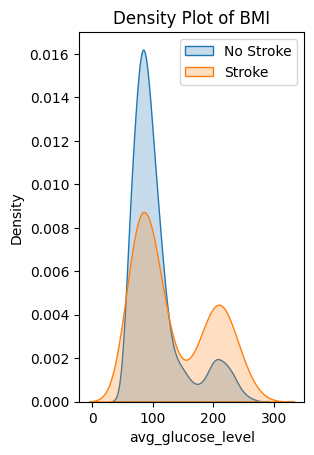

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# path to the file in the google drive
file_path = "/content/drive/My Drive/data/healthcare-dataset-stroke-data.csv"

# downloading data
df = pd.read_csv(file_path)

# checking downloading
df.head()

#increasing chart size
plt.figure(figsize = (14, 6))

#boxplot for glucose
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='viridis')
plt.title("Distribution of glucose level by Stroke")

#boxplot for BMI
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='stroke', y='bmi', palette='viridis')
plt.title("Distribution of BMI by Stroke")

plt.show()

#KDE charts for glucose and BMI
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'], label="No Stroke", shade=True)
sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], label="Stroke", shade=True)
plt.title("Density Plot of BMI")
plt.legend()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

df.info()
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Downloading data
df = pd.read_csv('/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv')

# Dropping
df.drop(columns=[id], inplace=True)

# Fill missing values ​​in bmi with median
imputer = SimpleImputer(strategy="median")
df[bmi] = imputer.fit_transform(df[[bmi]])

# Coding of categorical variables
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Splitting data into features (X) and target variable (y)
x = df.drop(columns=[])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git config --global user.name KBinjuminW
!git config --global user.email drova315@gmail.com

In [3]:
!git clone https://github.com/KBinjuminW/stroke-data-analysis.git

Cloning into 'stroke-data-analysis'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 861.25 KiB | 21.53 MiB/s, done.


In [4]:
!cp /content/Stroke.ipynb /content/stroke-data-analysis/

cp: cannot stat '/content/Stroke.ipynb': No such file or directory


In [6]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

'Copy of Welcome To Colab'	    Heart_disease.ipynb  'Копия блокнота "Stroke.ipynb"'
 Healthcare-Drug-Reviews-Analysis   Stroke.ipynb
